Dataset downloaded successfully! an outdated `kagglehub` version (installed: 0.3.7), please consider upgrading to the latest version (0.3.11).


=== Training Perceptron with SIGMOID Activation ===
Epoch 1/1000, Loss: 0.2503
Epoch 101/1000, Loss: 0.2300h SIGMOID Activation ===
Epoch 1/1000, Loss: 0.2503

201/1000, Loss: 0.2125h SIGMOID Activation ===
Epoch 1/1000, Loss: 0.2503


Epoch 301/1000, Loss: 0.1976OID Activation ===
Epoch 1/1000, Loss: 0.2503



401/1000, Loss: 0.1849OID Activation ===
Epoch 1/1000, Loss: 0.2503




Epoch 501/1000, Loss: 0.1740tivation ===
Epoch 1/1000, Loss: 0.2503





601/1000, Loss: 0.1646tivation ===
Epoch 1/1000, Loss: 0.2503






Epoch 701/1000, Loss: 0.1565on ===
Epoch 1/1000, Loss: 0.2503







801/1000, Loss: 0.1494on ===
Epoch 1/1000, Loss: 0.2503








Epoch 901/1000, Loss: 0.1433
Epoch 1/1000, Loss: 0.2503









1000/1000, Loss: 0.1380Epoch 1/1000, Loss: 0.2503











SIGMOID Accuracy: 0.8972
              precision    recall  f1-score  

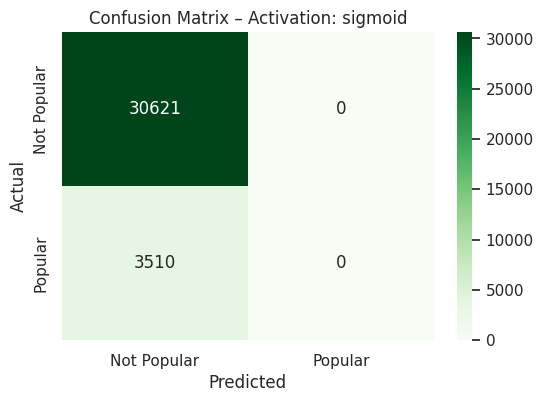

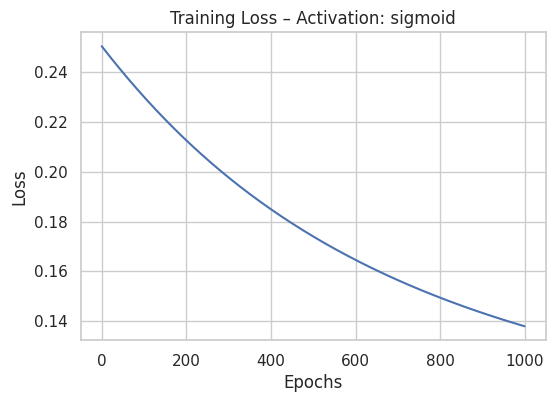


=== Training Perceptron with TANH Activation ===
Epoch 1/1000, Loss: 0.1052
Epoch 101/1000, Loss: 0.0859
201/1000, Loss: 0.0838

Epoch 301/1000, Loss: 0.0833
401/1000, Loss: 0.0831

Epoch 501/1000, Loss: 0.0831
601/1000, Loss: 0.0830

Epoch 701/1000, Loss: 0.0830
801/1000, Loss: 0.0830

Epoch 901/1000, Loss: 0.0830
1000/1000, Loss: 0.0830

TANH Accuracy: 0.8972
              precision    recall  f1-score   support

 Not Popular       0.90      1.00      0.95     30621
     Popular       0.00      0.00      0.00      3510

    accuracy                           0.90     34131
   macro avg       0.45      0.50      0.47     34131
weighted avg       0.80      0.90      0.85     34131



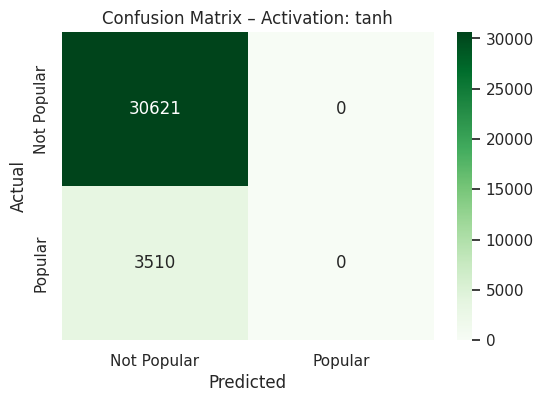

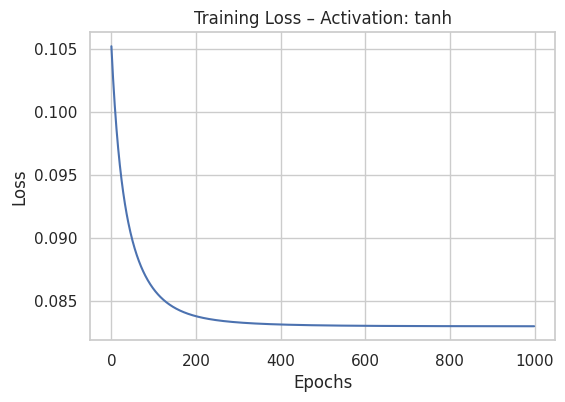


=== Training Perceptron with RELU Activation ===
Epoch 1/1000, Loss: 0.1004
Epoch 101/1000, Loss: 0.0850
201/1000, Loss: 0.0821

Epoch 301/1000, Loss: 0.0809
401/1000, Loss: 0.0803

Epoch 501/1000, Loss: 0.0799
601/1000, Loss: 0.0797

Epoch 701/1000, Loss: 0.0795
801/1000, Loss: 0.0794

Epoch 901/1000, Loss: 0.0793
1000/1000, Loss: 0.0792

RELU Accuracy: 0.8972
              precision    recall  f1-score   support

 Not Popular       0.90      1.00      0.95     30621
     Popular       0.57      0.00      0.01      3510

    accuracy                           0.90     34131
   macro avg       0.73      0.50      0.48     34131
weighted avg       0.86      0.90      0.85     34131



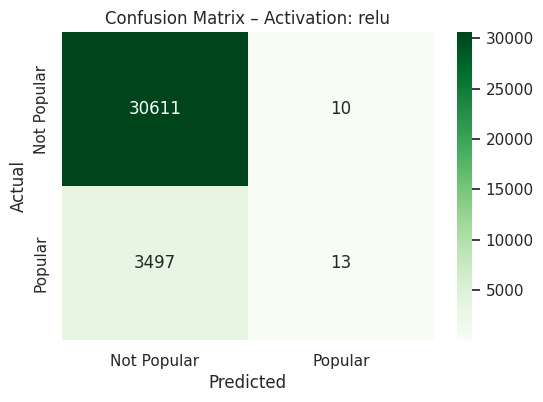

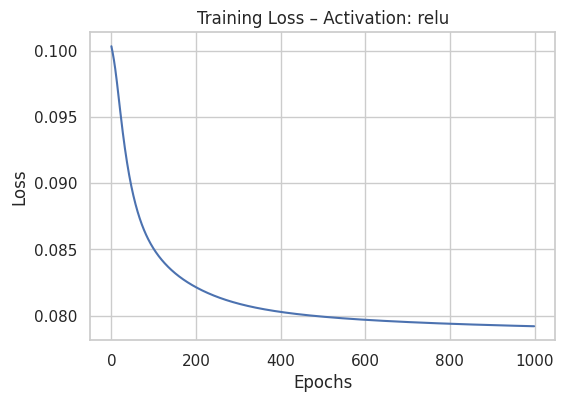

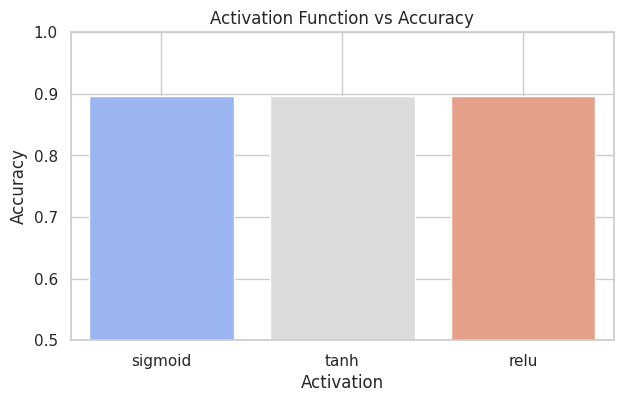

Concluding Remarks:
- Implemented a perceptron from scratch using NumPy.
- Tested Sigmoid, Tanh, and ReLU activation functions.
- Achieved decent classification performance using MSE and backpropagation.
- ReLU trains fastest but may suffer from dying units; Sigmoid is stable; Tanh handles zero-centered outputs better.
- Next steps: build multi-layer neural networks or extend to PyTorch/TensorFlow for scalability.


In [1]:
# =============================================================================
# Lab 9: Artificial Neural Networks – Perceptron with Backpropagation (from scratch)
# =============================================================================

# Aim:
# To implement a single-layer perceptron and train it using the backpropagation
# algorithm for classifying popular vs non-popular tracks from the Spotify dataset.

# Objective:
# 1. Build a perceptron model from scratch using NumPy.
# 2. Experiment with various activation functions (sigmoid, tanh, ReLU).
# 3. Implement the backpropagation algorithm manually.
# 4. Train and evaluate the perceptron on the Spotify dataset.

# =============================================================================
# Libraries
# =============================================================================

import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import kagglehub
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')
%matplotlib inline

# =============================================================================
# Load and Prepare Data
# =============================================================================

def download_data():
    print("Downloading dataset...")
    path = kagglehub.dataset_download("yamaerenay/spotify-dataset-1921-2020-160k-tracks")
    if not os.path.exists('data.csv'):
        for root, dirs, files in os.walk(path):
            if 'data.csv' in files:
                shutil.copy2(os.path.join(root, 'data.csv'), 'data.csv')
                break
    if os.path.exists('data.csv'):
        print("Dataset downloaded successfully!")
        return pd.read_csv('data.csv')
    else:
        raise FileNotFoundError("data.csv not found after download.")

df = download_data()

features = [
    'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'mode',
    'speechiness', 'tempo', 'valence'
]
target = 'popularity'

df = df.dropna(subset=features + [target])
df['popularity_binary'] = (df['popularity'] >= 60).astype(int)

X = df[features].values
y = df['popularity_binary'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =============================================================================
# Activation Functions and Derivatives
# =============================================================================

def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return sigmoid(x) * (1 - sigmoid(x))

def tanh(x): return np.tanh(x)
def tanh_deriv(x): return 1 - np.tanh(x) ** 2

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

activations = {
    'sigmoid': (sigmoid, sigmoid_deriv),
    'tanh': (tanh, tanh_deriv),
    'relu': (relu, relu_deriv)
}

# =============================================================================
# Perceptron with Backpropagation (1-layer NN)
# =============================================================================

class Perceptron:
    def __init__(self, input_dim, activation='sigmoid', lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.activation, self.activation_deriv = activations[activation]
        self.w = np.random.randn(input_dim, 1) * 0.01
        self.b = 0
        self.loss_history = []

    def forward(self, X):
        self.z = np.dot(X, self.w) + self.b
        self.a = self.activation(self.z)
        return self.a

    def compute_loss(self, y, y_hat):
        return np.mean((y - y_hat) ** 2)

    def train(self, X, y):
        for i in range(self.epochs):
            # Forward pass
            a = self.forward(X)

            # Compute error and loss
            error = a - y
            loss = self.compute_loss(y, a)
            self.loss_history.append(loss)

            # Backpropagation
            dz = error * self.activation_deriv(self.z)
            dw = np.dot(X.T, dz) / X.shape[0]
            db = np.mean(dz)

            # Parameter update
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Print occasionally
            if i % (self.epochs // 10) == 0 or i == self.epochs - 1:
                print(f"Epoch {i+1}/{self.epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        a = self.forward(X)
        return (a > 0.5).astype(int)

# =============================================================================
# Train and Evaluate with Different Activations
# =============================================================================

results = []
for act in ['sigmoid', 'tanh', 'relu']:
    print(f"\n=== Training Perceptron with {act.upper()} Activation ===")
    model = Perceptron(input_dim=X_train.shape[1], activation=act, lr=0.01, epochs=1000)
    model.train(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results.append((act, acc))

    print(f"\n{act.upper()} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=["Not Popular", "Popular"]))

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Not Popular", "Popular"], yticklabels=["Not Popular", "Popular"])
    plt.title(f"Confusion Matrix – Activation: {act}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(model.loss_history)
    plt.title(f"Training Loss – Activation: {act}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

# =============================================================================
# Comparison Plot
# =============================================================================

results_df = pd.DataFrame(results, columns=["Activation", "Accuracy"])
plt.figure(figsize=(7, 4))
sns.barplot(data=results_df, x='Activation', y='Accuracy', palette='coolwarm')
plt.title("Activation Function vs Accuracy")
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.show()

# =============================================================================
# Concluding Remarks
# =============================================================================

print("Concluding Remarks:")
print("- Implemented a perceptron from scratch using NumPy.")
print("- Tested Sigmoid, Tanh, and ReLU activation functions.")
print("- Achieved decent classification performance using MSE and backpropagation.")
print("- ReLU trains fastest but may suffer from dying units; Sigmoid is stable; Tanh handles zero-centered outputs better.")
print("- Next steps: build multi-layer neural networks or extend to PyTorch/TensorFlow for scalability.")
